# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('sinasc.csv')
df.head(10)

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
5,1,2516500.0,110001,1,33,5.0,1 a 3 anos,621005.0,2.0,1.0,...,5,6,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
6,1,2516500.0,110001,1,37,1.0,8 a 11 anos,999992.0,1.0,0.0,...,5,7,ATIVO,MUNIC,Novo Horizonte do Oeste,Rondônia,-11.70974,-61.99439,230.0,843.446
7,1,2516500.0,110001,1,27,2.0,12 anos ou mais,514120.0,0.0,0.0,...,5,8,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
8,1,2679477.0,110001,1,20,5.0,8 a 11 anos,621005.0,0.0,1.0,...,2,9,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
9,1,2679477.0,110001,1,30,2.0,1 a 3 anos,999992.0,1.0,1.0,...,5,10,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [3]:
conditions = [
    (df['APGAR5'] >= 0) & (df['APGAR5'] <= 3),
    (df['APGAR5'] >= 4) & (df['APGAR5'] <= 5),
    (df['APGAR5'] >= 6) & (df['APGAR5'] <= 7),
    (df['APGAR5'] >= 8) & (df['APGAR5'] <= 10)
]

# Definir os rótulos correspondentes às condições
labels = ['asfixia grave', 'asfixia moderada', 'asfixia leve', 'normal']

# Criar uma nova coluna chamada 'Categoria_APGAR5' com base nas condições e rótulos especificados
df['Categoria_APGAR5'] = np.select(conditions, labels, default='Outro')

# Exibir o DataFrame resultante
print(df)

       ORIGEM   CODESTAB  CODMUNNASC  LOCNASC  IDADEMAE  ESTCIVMAE  \
0           1  2679477.0      110001        1        19        5.0   
1           1  2679477.0      110001        1        29        2.0   
2           1  2679477.0      110001        1        37        9.0   
3           1  2516500.0      110001        1        30        5.0   
4           1  2516500.0      110001        1        30        2.0   
...       ...        ...         ...      ...       ...        ...   
27023       1  2604388.0      510340        1        32        2.0   
27024       1  2752654.0      510675        1        19        1.0   
27025       1  9659366.0      510787        1        24        2.0   
27026       1  9659366.0      510787        1        21        2.0   
27027       1  2795655.0      510792        1        18        5.0   

                ESCMAE  CODOCUPMAE  QTDFILVIVO  QTDFILMORT  ...  CONTADOR  \
0          8 a 11 anos         NaN         0.0         0.0  ...         1   
1    

#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

<Axes: xlabel='GESTACAO', ylabel='APGAR5'>

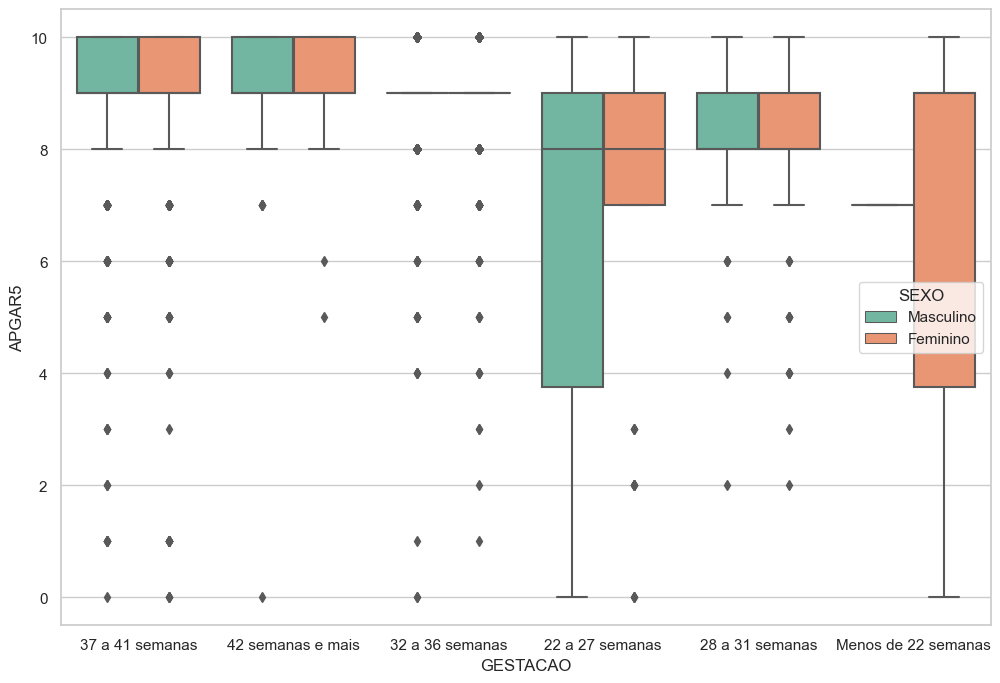

In [4]:
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

#Crie um boxplot, com eixo x Gestação > y Apgar5 > descrevendo Masculino e Feminino > do dataframe df > Paleta de cores Set2
sns.boxplot(x='GESTACAO', y='APGAR5', hue='SEXO', data=df, palette='Set2')


####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [5]:
tabela_cruzada = pd.crosstab(df['GESTACAO'], df['APGAR5'])
print(tabela_cruzada)

APGAR5               0.0   1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   \
GESTACAO                                                                    
22 a 27 semanas         7     0     8     6     1     0     2    10    24   
28 a 31 semanas         0     0     2     1     5     7     7    11    61   
32 a 36 semanas         2     2     2     2     8    11    17    56   362   
37 a 41 semanas         5    20     3     5     7    21    45   151  1417   
42 semanas e mais       1     0     0     0     0     1     1     5    44   
Menos de 22 semanas     1     0     1     0     0     0     0     1     0   

APGAR5                9.0   10.0  
GESTACAO                          
22 a 27 semanas         19     8  
28 a 31 semanas         55    13  
32 a 36 semanas       1307   465  
37 a 41 semanas      13565  7284  
42 semanas e mais      423   223  
Menos de 22 semanas      3     1  


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [6]:
freq_gestacao = tabela_cruzada.div(tabela_cruzada.sum(axis = 1), axis = 0)
freq_gestacao

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GESTACAO,,,,,,,,,,,
22 a 27 semanas,0.082353,0.000000,0.094118,0.070588,0.011765,0.000000,0.023529,0.117647,0.282353,0.223529,0.094118
28 a 31 semanas,0.000000,0.000000,0.012346,0.006173,0.030864,0.043210,0.043210,0.067901,0.376543,0.339506,0.080247
32 a 36 semanas,0.000895,0.000895,0.000895,0.000895,0.003581,0.004924,0.007610,0.025067,0.162041,0.585049,0.208147
37 a 41 semanas,0.000222,0.000888,0.000133,0.000222,0.000311,0.000932,0.001998,0.006704,0.062913,0.602273,0.323403
42 semanas e mais,0.001433,0.000000,0.000000,0.000000,0.000000,0.001433,0.001433,0.007163,0.063037,0.606017,0.319484
Menos de 22 semanas,0.142857,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.428571,0.142857


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

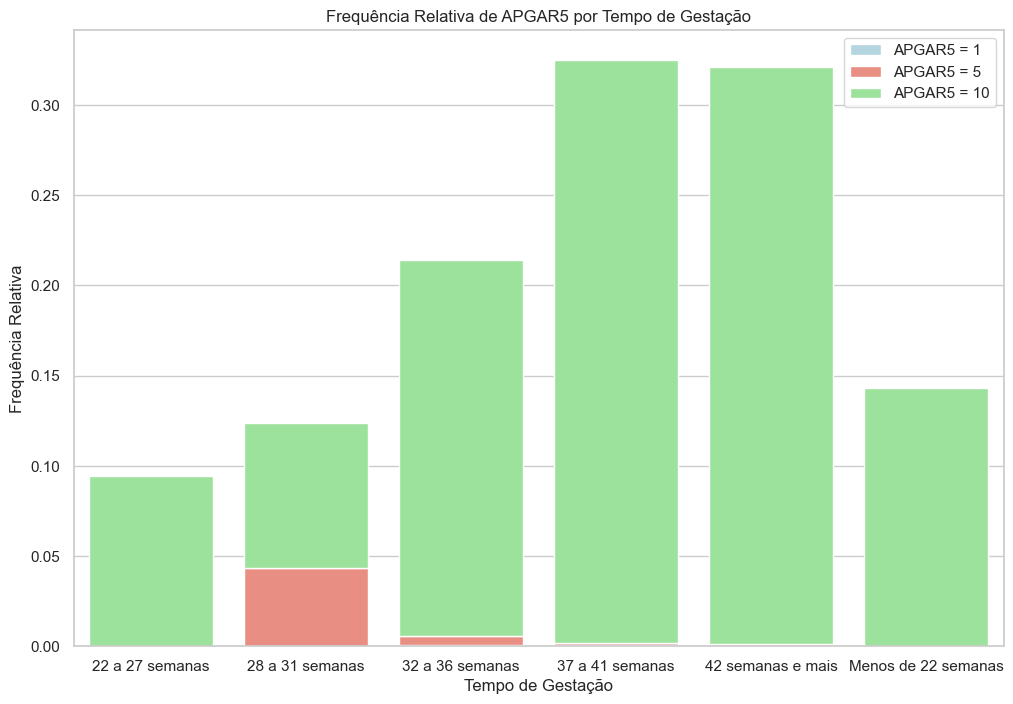

In [16]:
# Configurações do gráfico
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Criando o Grafico
sns.barplot(x=freq_gestacao.index, y=freq_gestacao[1], color='lightblue', label='APGAR5 = 1')
sns.barplot(x=freq_gestacao.index, y=freq_gestacao[5], color='salmon', label='APGAR5 = 5', bottom=freq_gestacao[1])
sns.barplot(x=freq_gestacao.index, y=freq_gestacao[10], color='lightgreen', label='APGAR5 = 10', bottom=freq_gestacao[1] + freq_gestacao[5])

# Adicionando rotulos
plt.title('Frequência Relativa de APGAR5 por Tempo de Gestação')
plt.xlabel('Tempo de Gestação')
plt.ylabel('Frequência Relativa')

# Adicionando Legendas
plt.legend()

# Mostrar o gráfico
plt.show()

De acordo com os dados, os casos que tiveram um APGAR abaixo de <= 5 foram nas semanas inferiores as 37 semanas de parto, o que pode fortalece a premissa 

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

<Axes: xlabel='APGAR5', ylabel='PESO'>

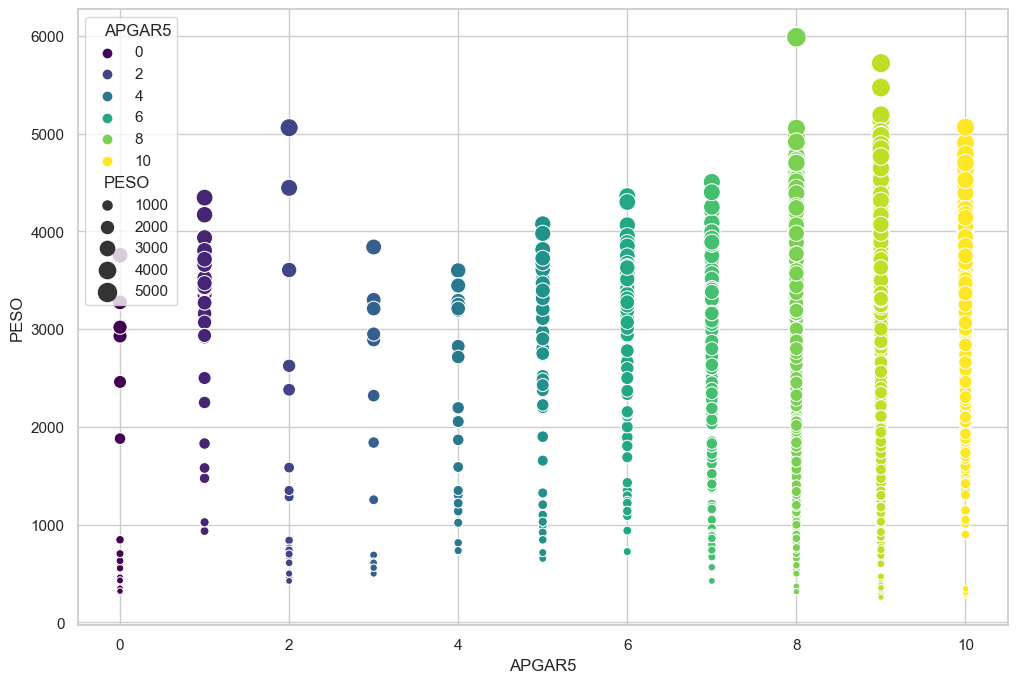

In [17]:
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Gráfico de dispersão
sns.scatterplot(x='APGAR5', y='PESO', data=df, hue='APGAR5', palette='viridis', size='PESO', sizes=(20, 200))


Podemos observar que quanto mais pesado o bebe menos é a chance de ter problemas de asfixia de acordo com o APGAR5, a partir dos 4kg de peso torna-se mais provavel que o bebe tenha graus de 6~10 de APGAR5 
